In [23]:
plt.style.use('seaborn')

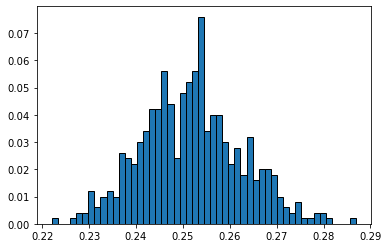

CPU times: user 1h 5min 24s, sys: 20 s, total: 1h 5min 44s
Wall time: 14h 10min 56s


In [21]:
%%time

import numpy as np
import matplotlib.pyplot as plt


re_lim=(-2,1) 
im_lim=(-1,1)
data = []

for sim in range(500):

    # (b-a)*rand + a
    MAX_ITER = 1000

    width = 1000
    height = 900

    re = -3*np.random.rand(width) + 1
    #print(re)
    im = (-2*np.random.rand(height)+1) * 1j
    #print(im)

     # create a matrix with the complex values
    c_matrix =  np.full((height,width), re) + np.full((width,height), im).transpose()
    #print(c_matrix)

    # create the counter matrix "n" and the z matrix
    n = np.zeros((height,width))
    z = np.zeros((height,width))

     # iterate until the threshold is reached
    for k in range(MAX_ITER):
        # add one to n_ij only if abs(z_ij[k])<=2
        n = np.where(np.abs(z)<=2, n+1, n)
        # calculate z_ij[k+1] only if abs(z_ij[k])<=2
        z = np.where(np.abs(z)<=2, np.square(z) + c_matrix, z)
        
    count_inside = 0
    for i in range(height):
        for j in range(width):
            if(n[i][j] >= MAX_ITER):
                count_inside += 1

    # monte carlo
    total_points = width*height
    avg = count_inside/total_points
    data.append(avg)
    
weights = np.ones_like(data) / len(data)
plt.hist(data,weights=weights, bins= 50, edgecolor='black')
plt.show()

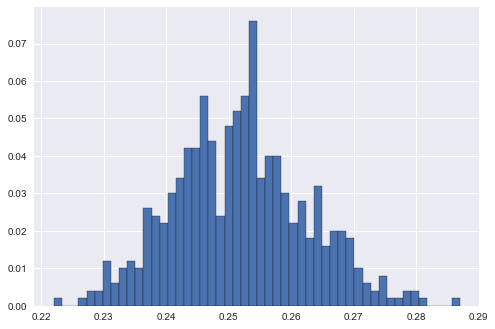

In [24]:
weights = np.ones_like(data) / len(data)
plt.hist(data,weights=weights, bins= 50, edgecolor='black')
plt.show()

In [ ]:
count_inside = 0
for i in range(height):
    for j in range(width):
        if(n[i][j] >= MAX_ITER):
            count_inside += 1

# monte carlo
total_points = width*height
rectangle_area = 6
area_mandelbrot = (count_inside/total_points)*rectangle_area

print(area_mandelbrot)

# Google - area of the Mandelbrot set is approximately 1.506484, with a 95% confidence interval from 1.506480 to 1.506488

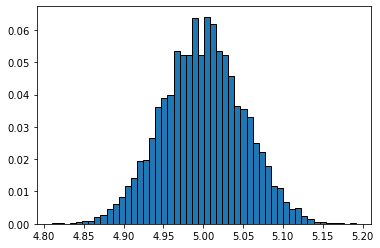

CPU times: user 3min 27s, sys: 275 ms, total: 3min 27s
Wall time: 3min 27s


In [17]:
%%time
# random variable values - 1 or 0(inside the mandelbrot or not)
import numpy as np
import matplotlib.pyplot as plt
data = []
# tossing a coin - 0 or 1
for sim in range(10000):
    sum = 0
    for i in range(10000):
        coin = np.random.randint(0, 2)
        #print(coin)
        sum += coin
    avg = sum/1000
    data.append(avg)
    
weights = np.ones_like(data) / len(data)
plt.hist(data,weights=weights, bins= 50, edgecolor='black')
plt.show()






In [13]:
print(np.random.randint(0, 2))

1


In [ ]:
alpha = 0.05
confidence interval = 95%
Z_0.025 = 1.96
actual_area_madelbrot = 1.506484

error_allowed = 1%

In [22]:
actual_area_madelbrot = 1.506484
print(actual_area_madelbrot*0.01)

0.01506484


l = 0.01506484

atop when $ 2*z_{α/2}*S / \sqrt{k} <  l $

In [ ]:
%%time

MAX_ITER = 2000

def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < MAX_ITER:
        z = z*z + c
        n += 1
    return n

n = 100


# Plot window
RE_START = -2
RE_END = +1
IM_START = -1
IM_END = +1

counter = 0

re = -3*np.random.rand(width) + 1
#print(re)
im = (-2*np.random.rand(height)+1) * 1j
#print(im)

for x in range(0, WIDTH):
    for y in range(0, HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(RE_START + (x / WIDTH) * (RE_END - RE_START),
                    IM_START + (y / HEIGHT) * (IM_END - IM_START))
        # Compute the number of iterations
        m = mandelbrot(c)
        if(m >= MAX_ITER):
            counter += 1
        result.append(m)
        # The color depends on the number of iterations
        color = 255 - int(m * 255 / MAX_ITER)
        #print(color)
        # Plot the point
        draw.point([x, y], (color, color, color))

im.save('output.png', 'PNG')
print(counter)